[R Bloggers link](https://www.r-bloggers.com/statistics-sunday-creating-wordclouds/)

In [1]:
library(quanteda)

Package version: 1.3.4
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: 'quanteda'

The following object is masked from 'jupyter:irkernel':

    View

The following object is masked from 'package:utils':

    View



In [2]:
data(data_corpus_inaugural)

speeches <- data_corpus_inaugural$documents

row.names(speeches) <- NULL

In [3]:
class(speeches)

[1] "data.frame"

In [5]:
names(speeches)

[1] "texts"     "Year"      "President" "FirstName"

In [6]:
str(speeches)

'data.frame':	58 obs. of  4 variables:
 $ texts    : chr  "Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life n"| __truncated__ "Fellow citizens, I am again called upon by the voice of my country to execute the functions of its Chief Magist"| __truncated__ "When it was first perceived, in early times, that no middle course for America remained between unlimited submi"| __truncated__ "Friends and Fellow Citizens:\n\nCalled upon to undertake the duties of the first executive office of our countr"| __truncated__ ...
 $ Year     : num  1789 1793 1797 1801 1805 ...
 $ President: chr  "Washington" "Washington" "Adams" "Jefferson" ...
 $ FirstName: chr  "George" "George" "John" "Thomas" ...


In [7]:
library(tidytext)
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [8]:
speeches_tidy <- speeches %>% unnest_tokens(word, texts) %>% anti_join(stop_words)

Joining, by = "word"


In [9]:
library(wordcloud)

Loading required package: RColorBrewer


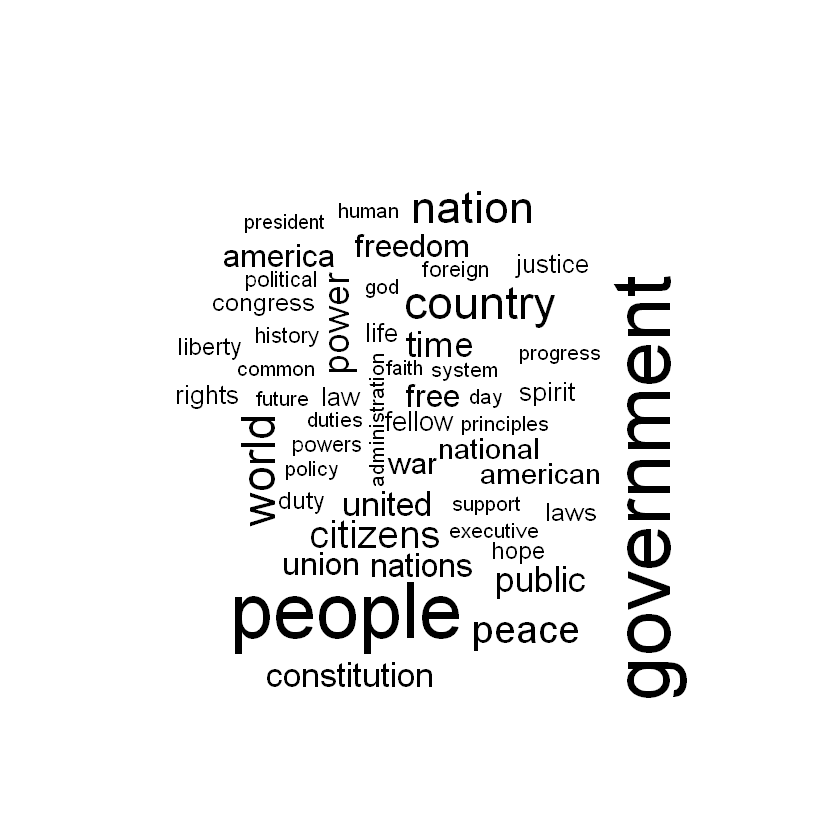

In [10]:
speeches_tidy %>% count(word, sort = TRUE) %>% with(wordcloud(word, n, max.words = 50))

In [11]:
library(reshape2)


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



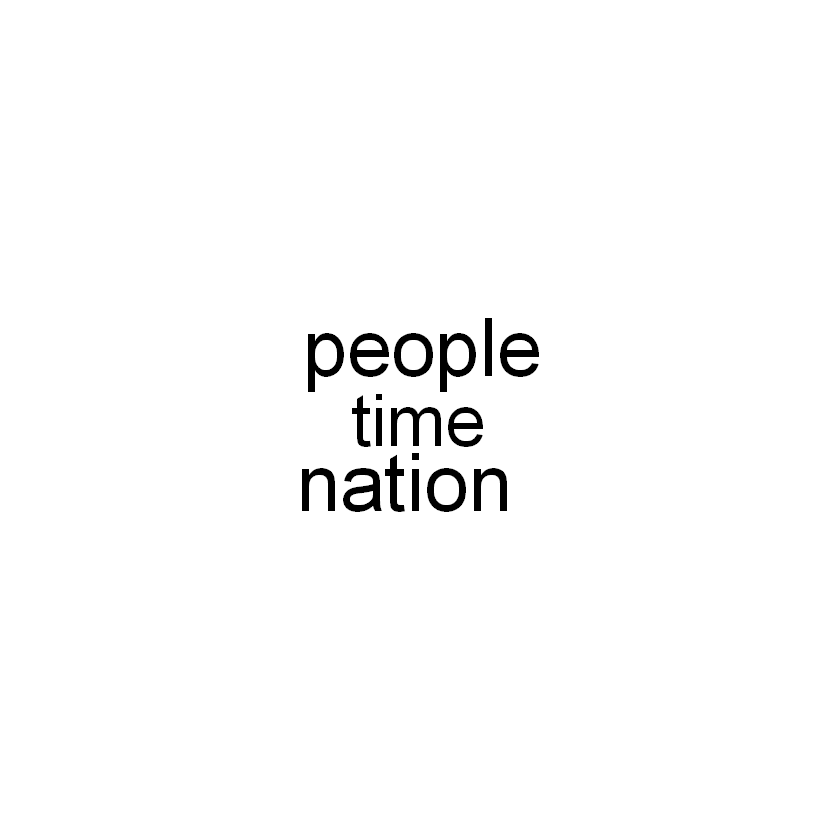

In [16]:
speeches_tidy %>%
filter(President == "Obama") %>% 
count(word, sort = TRUE) %>%
with(wordcloud(word, n, max.words = 3))

In [17]:
unique(speeches_tidy$President)

[1] "Washington" "Adams"      "Jefferson"  "Madison"    "Monroe"    
 [6] "Jackson"    "Van Buren"  "Harrison"   "Polk"       "Taylor"    
[11] "Pierce"     "Buchanan"   "Lincoln"    "Grant"      "Hayes"     
[16] "Garfield"   "Cleveland"  "McKinley"   "Roosevelt"  "Taft"      
[21] "Wilson"     "Harding"    "Coolidge"   "Hoover"     "Truman"    
[26] "Eisenhower" "Kennedy"    "Johnson"    "Nixon"      "Carter"    
[31] "Reagan"     "Bush"       "Clinton"    "Obama"      "Trump"

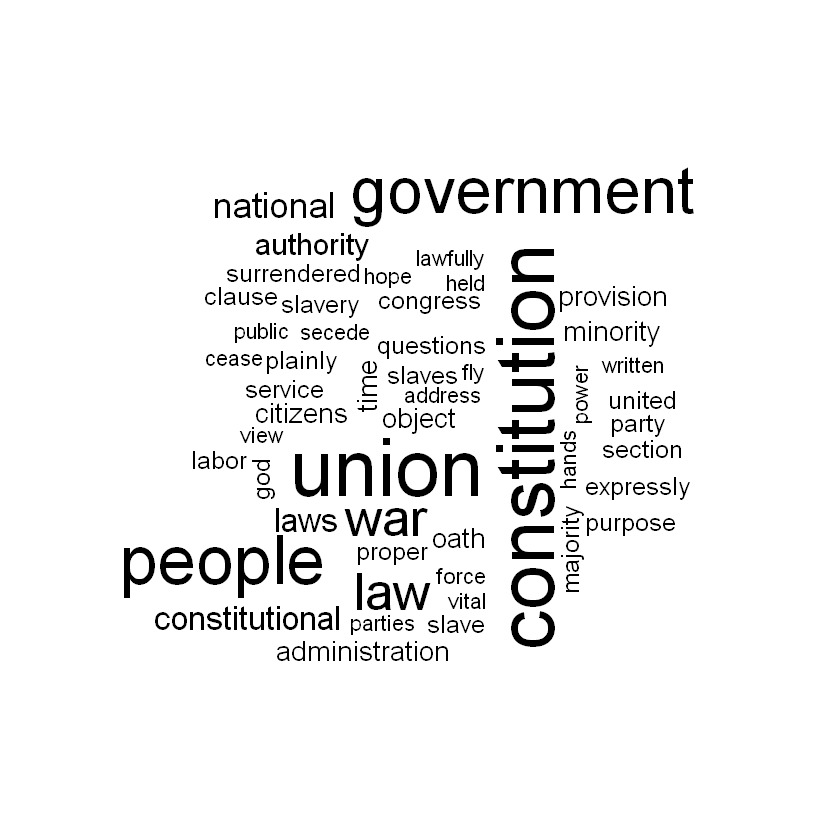

In [19]:
speeches_tidy %>%
filter(President == "Lincoln") %>% 
count(word, sort = TRUE) %>%
with(wordcloud(word, n, max.words = 50))

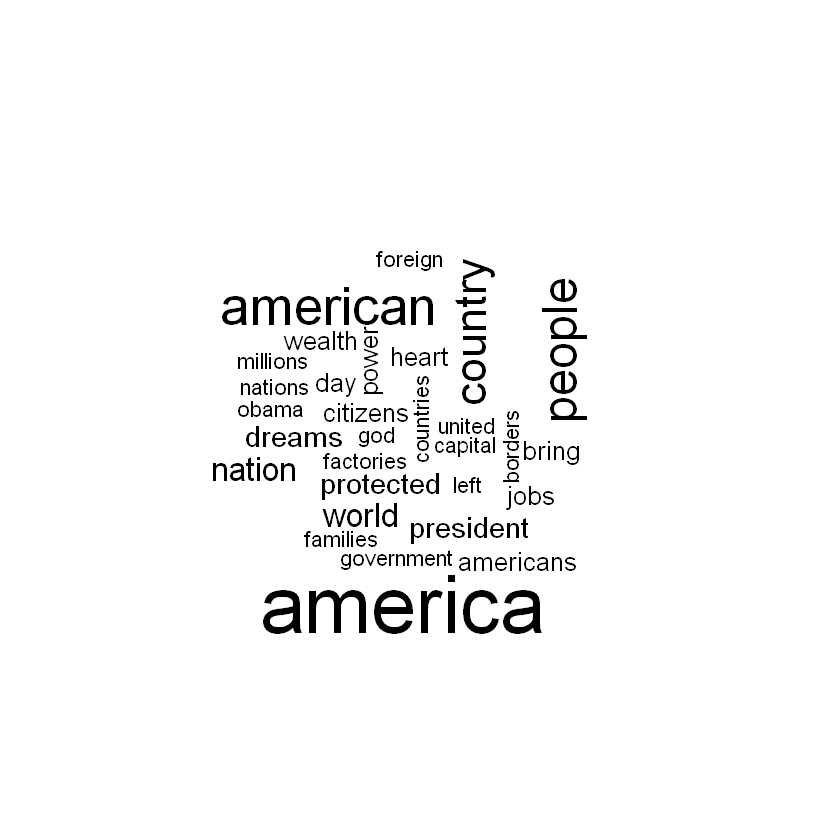

In [23]:
speeches_tidy %>%
filter(President == "Trump") %>% 
count(word, sort = TRUE) %>%
with(wordcloud(word, n, max.words = 100))

Joining, by = "word"


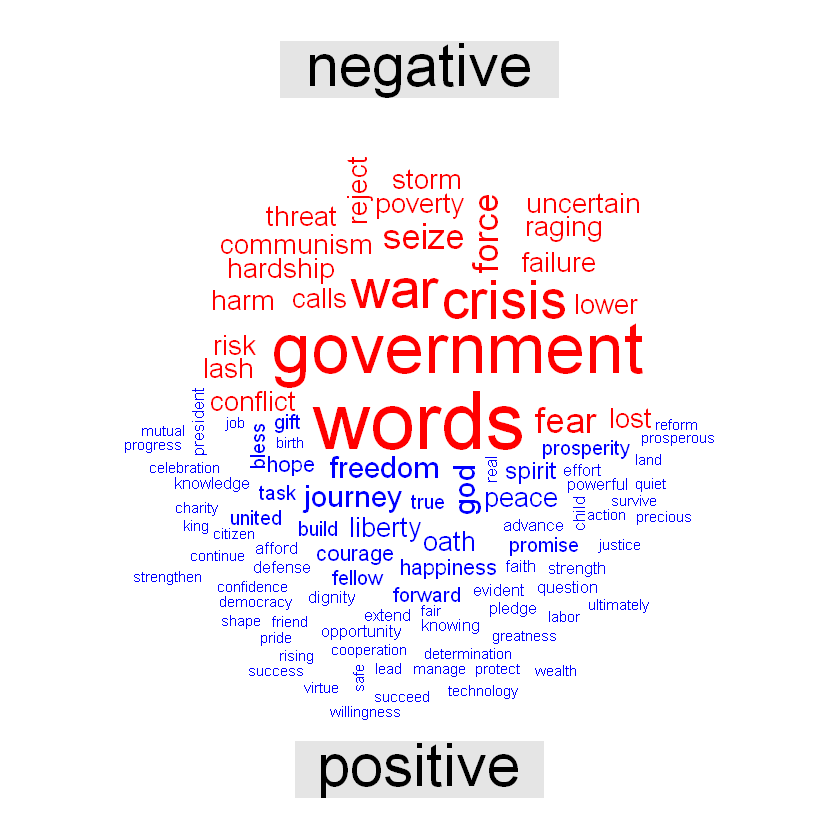

In [20]:
obama_words <- speeches_tidy %>%
  filter(President == "Obama") %>%
  count(word, sort = TRUE)

obama_words %>%
  inner_join(get_sentiments("nrc") %>%
               filter(sentiment %in% c("positive",
                                       "negative"))) %>%
  filter(n > 1) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("red","blue"))